In [32]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

C:\Users\m1852\python\py312\Scripts\edhec_risk_kit.py:87: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("data/ind30_m_vw_rets.csv", header = 0, index_col = 0, parse_dates = True)/100


In [33]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd

def msr(riskfree_rate, er, cov): 
    """
    RiskFree rate + ER + COV -> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    weights_sum_to_1 = {
        "type": "eq",
        "fun": lambda weights: np.sum(weights) - 1
    }

    def neg_sharpe_ratio(weights, riskfree_rate, er, cov): 
        """
        Returns the negative of the sharpe ratio, given weights
        """
        r = erk.portfolio_return(weights, er)
        vol = erk.portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol
    
    results = minimize(neg_sharpe_ratio, init_guess, 
                       args = (riskfree_rate, er, cov,), 
                       method = "SLSQP", 
                       options = {"disp": False}, 
                       constraints = (weights_sum_to_1),
                       bounds = bounds
                      )
    return results.x

(0.0, 0.14178366279845073)

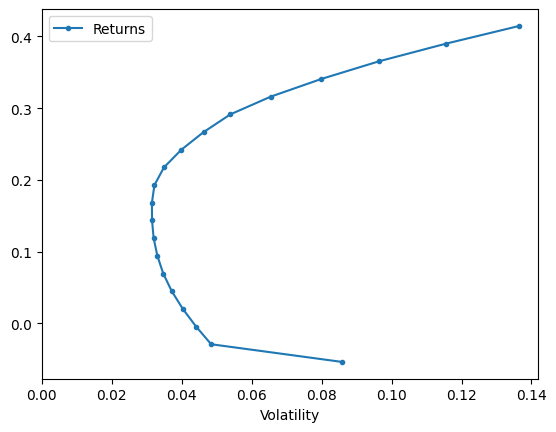

In [34]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)


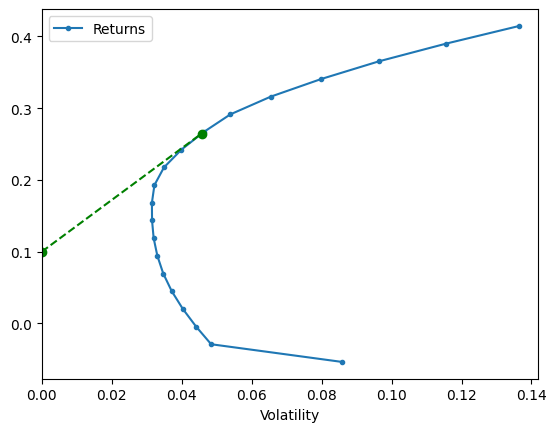

In [35]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)

rf = 0.1
w_msr = msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)

# Add CML:
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color = "green", marker = "o", linestyle = "dashed")

In [36]:
def plot_ef(n_points, er, cov, show_cml = False, style = ".-", riskfree_rate = 0):
   
    weights = optimal_weights(n_points, er, cov)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    ax = ef.plot.line(x = "Volatility", y = "Returns", style = style)
    
    if show_cml: 
        ax.set_xlim(left = 0)
        w_msr = msr(riskfree_rate, er, cov)
        r_msr = portfolio_return(w_msr, er)
        vol_msr = portfolio_vol(w_msr, cov)
        # Add CML:
        cml_x = [0, vol_msr]
        cml_y = [riskfree_rate, r_msr]
        ax.plot(cml_x, cml_y, color = "green", marker = "o", linestyle = "dashed", markersize = 12, linewidth = 2)
    
    return ax

    
        

NameError: name 'erk' is not defined

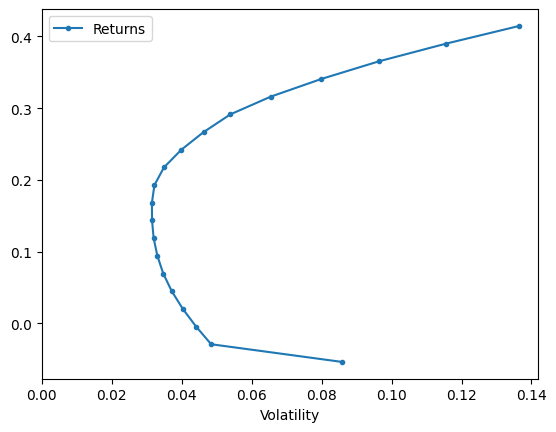

In [37]:
erk.plot_ef(20,er,cov, show_cml = True)